## Damage detection from satellite imagery after Hurricane Harvey in 2017 (image classification)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
import glob as glob

## Getting the data

Data obtained from https://github.com/qcao10/DamageDetection

Data collection and processing documented in 

Cao and Choe, "Detecting Damaged Buildings on Post-Hurricane Satellite Imagery Based on Customized Convolutional Neural Networks".  arXiv:1807.01688v2 [cs.CV]. 28 November 2018.

In [4]:
path = Path('/home/jmn21373/DamageDetection')

In [5]:
path.ls()

[PosixPath('/home/jmn21373/DamageDetection/arxiv_DamageDetection_July4_csCV.pdf'),
 PosixPath('/home/jmn21373/DamageDetection/bad_images'),
 PosixPath('/home/jmn21373/DamageDetection/README.md'),
 PosixPath('/home/jmn21373/DamageDetection/tomnod_aws.ipynb'),
 PosixPath('/home/jmn21373/DamageDetection/validation_another'),
 PosixPath('/home/jmn21373/DamageDetection/test'),
 PosixPath('/home/jmn21373/DamageDetection/damage'),
 PosixPath('/home/jmn21373/DamageDetection/poster_Cao_NHW_48x48-07072018.pdf'),
 PosixPath('/home/jmn21373/DamageDetection/no_damage'),
 PosixPath('/home/jmn21373/DamageDetection/tomnod_everything_relu_Adam.h5'),
 PosixPath('/home/jmn21373/DamageDetection/test_another'),
 PosixPath('/home/jmn21373/DamageDetection/models'),
 PosixPath('/home/jmn21373/DamageDetection/.git'),
 PosixPath('/home/jmn21373/DamageDetection/train_another'),
 PosixPath('/home/jmn21373/DamageDetection/Post-hurricane.zip')]

## Binary classification

Use transforms for satellite imagery.

In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

Need to examine the images to see what size they are.  Paper seems to indicate 128x128 pixels.  

In [7]:
imgs = glob.glob('/home/jmn21373/DamageDetection/train_another/damage/*.jpeg')

In [11]:
imgs

['/home/jmn21373/DamageDetection/train_another/damage/-95.64188399999999_29.770346000000004.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.617438_29.765421999999997.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-96.920896_28.714140000000004.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.175437_30.033289.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.641269_29.774726.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-93.656543_30.139870000000002.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.588803_29.762938000000002.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.63900799999999_29.844596000000003.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.274866_29.605797999999997.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.569389_29.754082.jpeg',
 '/home/jmn21373/DamageDetection/train_another/damage/-95.088135_29.902714000000003.jpeg',
 '/home/jm

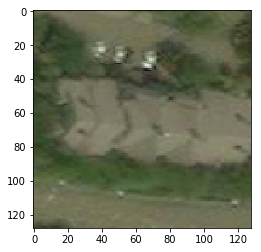

In [8]:
img = plt.imread(imgs[2900])
plt.imshow(img);

In [6]:
bs=64

In [7]:
data = ImageDataBunch.from_folder(path=path, train='train_another', valid='validation_another', ds_tfms=tfms, size=128, bs=bs)
       

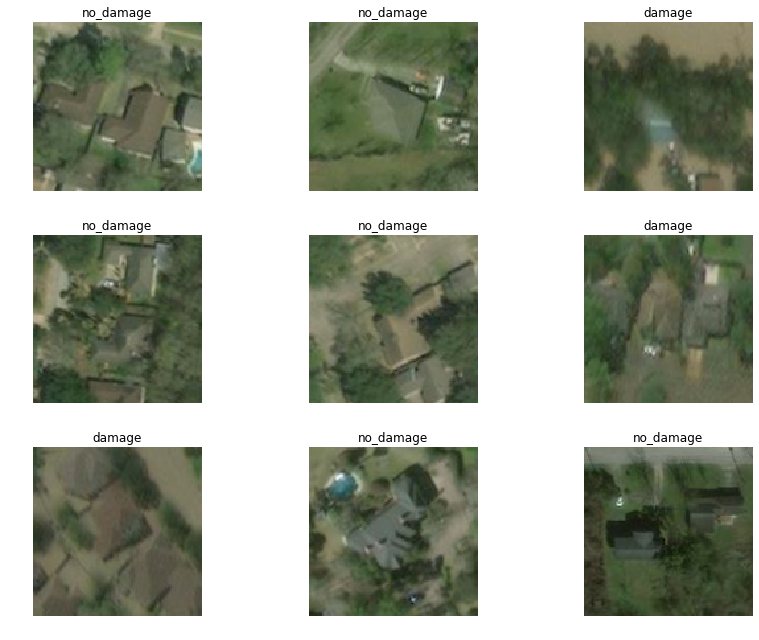

In [8]:
data.show_batch(rows=3, figsize=(12,9))

Visualize transformations

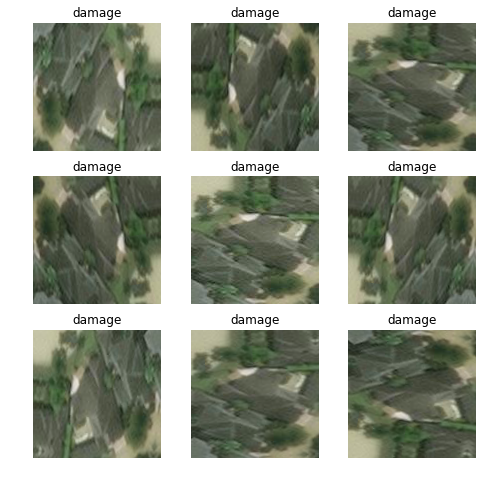

In [16]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [9]:
arch = models.resnet50

In [10]:
learn = cnn_learner(data, arch, metrics=accuracy)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


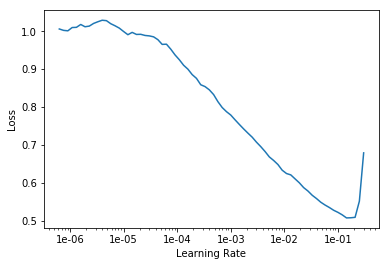

In [22]:
learn.recorder.plot()

In [11]:
lr = 1e-2

In [12]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.198911,0.124318,0.953500,00:22
1,0.118771,0.091133,0.967500,00:18
2,0.083168,0.067817,0.973500,00:17
3,0.058613,0.057957,0.978000,00:17
4,0.047977,0.055657,0.978500,00:17


Let's get a detailed look at the structure of this resnet50 network.

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [21]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
______________________________________________________________

In [27]:
learn.save('stage-1-rn50')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

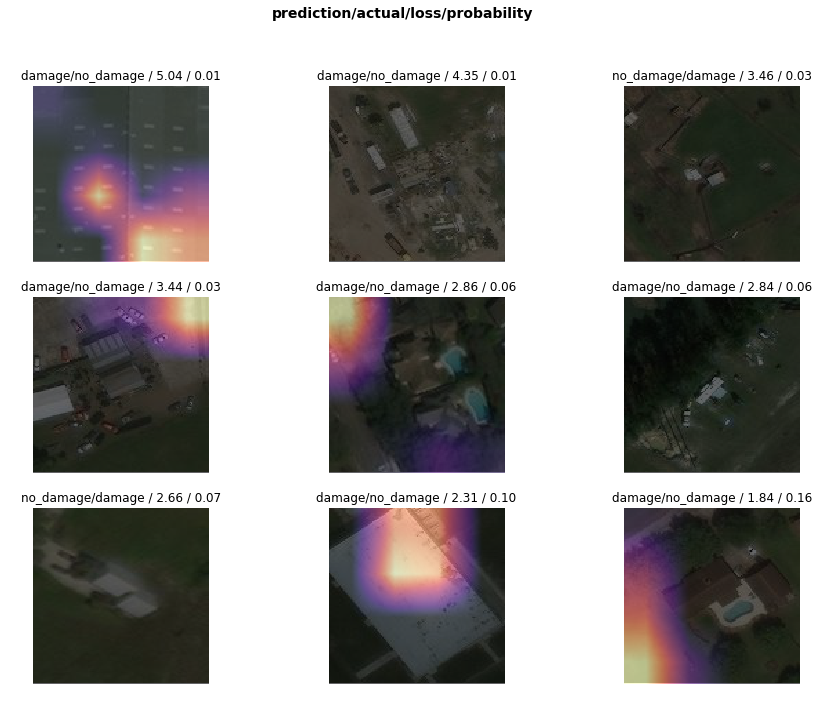

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

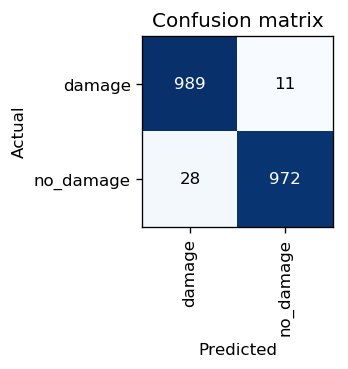

In [30]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=120)

## Convolution kernel

Category damage

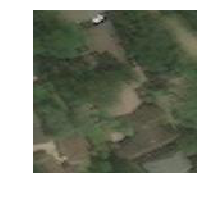

In [27]:
idx=0
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [42]:
k = tensor([
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

In [43]:
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

This kernel looks for bottom right corners.  Note positive numbers last row and column, negative elsewhere.

In [44]:
k.shape

torch.Size([1, 3, 3, 3])

In [45]:
t = data.valid_ds[0][0].data; t.shape

torch.Size([3, 128, 128])

In [46]:
t[None].shape

torch.Size([1, 3, 128, 128])

In [47]:
edge = F.conv2d(t[None], k)

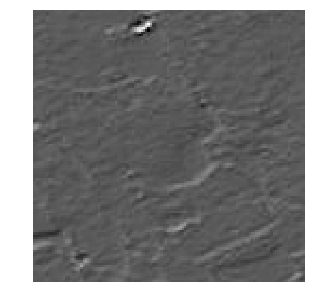

In [48]:
show_image(edge[0], figsize=(5,5));

## Heatmap

In [28]:
m = learn.model.eval();

In [29]:
xb,_ = data.one_item(x)

In [30]:
type(xb)

torch.Tensor

In [31]:
type(x)

fastai.vision.image.Image

In [32]:
xb_im = x

I don't need to denormalize because I never normalized to Imagenet standard in the first place, unlike lesson6-pets0-more.  When I left this in originally, it gave me an error message.

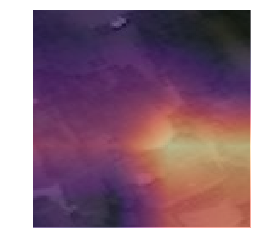

In [41]:
#xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()
from fastai.callbacks.hooks import *
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g
hook_a,hook_g = hooked_backward()
acts  = hook_a.stored[0].cpu()
acts.shape
avg_acts = acts.mean(0)
avg_acts.shape
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    #ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              #interpolation='bilinear', cmap='magma');
    ax.imshow(hm, alpha=0.6, extent=(0,128,128,0),
              interpolation='bilinear', cmap='magma');
show_heatmap(avg_acts)

Above didn't work originally because I specified 352x352 pixels in imshow().  My chips here are only 128x128, so it originally looked really weird.  Once I fixed the correct pixel size, it makes sense.

I should try this on social media images also- might be easier to verify that it makese sense.

On to Grad-CAM.

Paper: [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)

In [38]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape,grad_chan.shape

(torch.Size([2048, 4, 4]), torch.Size([2048]))

In [39]:
mult = (acts*grad_chan[...,None,None]).mean(0)

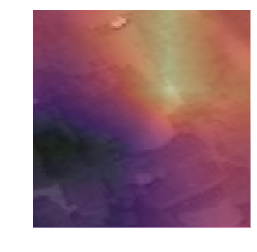

In [40]:
show_heatmap(mult)